# Exploring the food price global database

## Load the libraries and the csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-2_qp3t63 because the default path (/home/drifter/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
!ls

adrian_food_global_pricing.ipynb  adrian_nutrients.ipynb


In [3]:
price_df = pd.read_csv('../raw_data/wfp_food_prices_database.csv')
price_df.head()

/home/drifter/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [4]:
price_df.shape

(1560551, 18)

In [5]:
price_df.columns

Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource'],
      dtype='object')

In [6]:
price_df['cm_name'].nunique()

777

In [7]:
price_df['cm_name'].sort_values().unique()[-50]

'Wage (non-qualified labour) - Retail'

In [8]:
price_df.isnull().sum()/len(price_df)

adm0_id               0.000000
adm0_name             0.000000
adm1_id               0.000000
adm1_name             0.302027
mkt_id                0.000000
mkt_name              0.000000
cm_id                 0.000000
cm_name               0.000000
cur_id                0.000000
cur_name              0.000000
pt_id                 0.000000
pt_name               0.000000
um_id                 0.000000
um_name               0.000000
mp_month              0.000000
mp_year               0.000000
mp_price              0.000000
mp_commoditysource    1.000000
dtype: float64

In [9]:
#dropping the mp_commoditysource because it's 100% Nan's

# price_df.drop(columns='mp_commoditysource', inplace=True)

In [10]:
price_df['cm_name'].sort_values().unique()

array(['Apples (dried) - Retail', 'Apples (red) - Retail',
       'Apples (red) - Wholesale', 'Apples - Retail',
       'Apples - Wholesale', 'Avocados - Retail', 'Avocados - Wholesale',
       'Bananas (imported) - Retail', 'Bananas (local) - Retail',
       'Bananas (medium size) - Retail', 'Bananas - Retail',
       'Bananas - Wholesale', 'Barley (mixed) - Wholesale',
       'Barley (white) - Wholesale', 'Barley - Retail',
       'Barley - Wholesale', 'Batteries (big) - Retail',
       'Batteries (small) - Retail', 'Beans (black) - Retail',
       'Beans (black) - Wholesale', 'Beans (black, Nayarit) - Wholesale',
       'Beans (black, Veracruz) - Wholesale',
       'Beans (black, Zacatecas) - Wholesale',
       'Beans (black, imported) - Wholesale', 'Beans (butter) - Retail',
       'Beans (catarino) - Retail', 'Beans (cranberry) - Retail',
       'Beans (cranberry) - Wholesale', 'Beans (dry) - Retail',
       'Beans (dry) - Wholesale', 'Beans (fava) - Retail',
       'Beans (fava) 

In [12]:
#price_df['type'].sort_values().nunique()

In [13]:
# freq_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [14]:
#price_df.dropna(subset=['adm1_name'], inplace=True)

In [15]:
price_df.isnull().sum()/len(price_df)

adm0_id               0.000000
adm0_name             0.000000
adm1_id               0.000000
adm1_name             0.302027
mkt_id                0.000000
mkt_name              0.000000
cm_id                 0.000000
cm_name               0.000000
cur_id                0.000000
cur_name              0.000000
pt_id                 0.000000
pt_name               0.000000
um_id                 0.000000
um_name               0.000000
mp_month              0.000000
mp_year               0.000000
mp_price              0.000000
mp_commoditysource    1.000000
dtype: float64

In [16]:
#trying the format to pick the type of food
#slicing the string by the dashes
price_df['cm_name'][0].split('-')

['Bread ', ' Retail']

In [17]:
#removing the part of the string after the '-'
price_df['type'] = price_df['cm_name'].apply(lambda x: x.split('-')[0])

price_df['type'].head()

0    Bread 
1    Bread 
2    Bread 
3    Bread 
4    Bread 
Name: type, dtype: object

In [18]:
price_df.sort_values(by='type').head(15)

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,type
919650,175.0,Nepal,2154,Far Western,3905,Dhangadhi,345,Apples - Retail,0.0,NPR,15,Retail,5,KG,6,2019,180.0000,NaN,Apples
925290,175.0,Nepal,2156,Western,3837,Baglung,345,Apples - Retail,0.0,NPR,15,Retail,5,KG,5,2020,325.0000,NaN,Apples
925291,175.0,Nepal,2156,Western,3837,Baglung,345,Apples - Retail,0.0,NPR,15,Retail,5,KG,6,2020,200.0000,NaN,Apples
925292,175.0,Nepal,2156,Western,3837,Baglung,345,Apples - Retail,0.0,NPR,15,Retail,5,KG,7,2020,500.0000,NaN,Apples
1337086,238.0,Syrian Arab Republic,2836,City_Damascus,1112,Sheikh Sa'ad,345,Apples - Retail,0.0,SYP,15,Retail,5,KG,12,2019,475.0000,NaN,Apples
1337085,238.0,Syrian Arab Republic,2836,City_Damascus,1112,Sheikh Sa'ad,345,Apples - Retail,0.0,SYP,15,Retail,5,KG,11,2019,350.0000,NaN,Apples
1337084,238.0,Syrian Arab Republic,2836,City_Damascus,1112,Sheikh Sa'ad,345,Apples - Retail,0.0,SYP,15,Retail,5,KG,10,2019,250.0000,NaN,Apples
1337083,238.0,Syrian Arab Republic,2836,City_Damascus,1112,Sheikh Sa'ad,345,Apples - Retail,0.0,SYP,15,Retail,5,KG,9,2019,333.3333,NaN,Apples
1337082,238.0,Syrian Arab Republic,2836,City_Damascus,1112,Sheikh Sa'ad,345,Apples - Retail,0.0,SYP,15,Retail,5,KG,8,2019,275.0000,NaN,Apples
1337081,238.0,Syrian Arab Republic,2836,City_Damascus,1112,Sheikh Sa'ad,345,Apples - Retail,0.0,SYP,15,Retail,5,KG,7,2019,325.0000,NaN,Apples


In [43]:
price_df['type'].nunique()

573

In [19]:
#list of unique values for the type of food
price_df['type'].sort_values().unique()

array(['Apples ', 'Apples (dried) ', 'Apples (red) ', 'Avocados ',
       'Bananas ', 'Bananas (imported) ', 'Bananas (local) ',
       'Bananas (medium size) ', 'Barley ', 'Barley (mixed) ',
       'Barley (white) ', 'Batteries (big) ', 'Batteries (small) ',
       'Beans ', 'Beans (black) ', 'Beans (black, Nayarit) ',
       'Beans (black, Veracruz) ', 'Beans (black, Zacatecas) ',
       'Beans (black, imported) ', 'Beans (butter) ', 'Beans (catarino) ',
       'Beans (cranberry) ', 'Beans (dry) ', 'Beans (fava) ',
       'Beans (fava, dry) ', 'Beans (fresh) ', 'Beans (green, fresh) ',
       'Beans (haricot) ', 'Beans (haricot, red) ',
       'Beans (haricot, white) ', 'Beans (kidney red) ',
       'Beans (kidney white) ', 'Beans (kidney) ',
       'Beans (kidney, pinto) ', 'Beans (magnum) ', 'Beans (mung) ',
       'Beans (niebe) ', 'Beans (niebe, white) ', 'Beans (pod) ',
       'Beans (red) ', 'Beans (red, fresh) ', 'Beans (silk red) ',
       'Beans (string) ', 'Beans (sugar', '

In [20]:
price_df['mp_year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2000, 2001, 2002, 1996,
       1997, 1998, 1999, 1994, 1995, 1992, 1993, 1990, 1991])

In [21]:
price_df_2020 = price_df.loc[price_df['mp_year'] == 2020]
price_df_2020.head(10)

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,type
69,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2020,50.000,NaN,Bread
70,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2020,50.000,NaN,Bread
71,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2020,50.000,NaN,Bread
72,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2020,50.000,NaN,Bread
275,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,84,Wheat - Retail,0.0,AFN,15,Retail,5,KG,1,2020,25.375,NaN,Wheat
276,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,84,Wheat - Retail,0.0,AFN,15,Retail,5,KG,2,2020,26.750,NaN,Wheat
277,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,84,Wheat - Retail,0.0,AFN,15,Retail,5,KG,3,2020,29.050,NaN,Wheat
278,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,84,Wheat - Retail,0.0,AFN,15,Retail,5,KG,4,2020,31.400,NaN,Wheat
431,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,145,Rice (low quality) - Retail,0.0,AFN,15,Retail,5,KG,1,2020,57.000,NaN,Rice (low quality)
432,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,145,Rice (low quality) - Retail,0.0,AFN,15,Retail,5,KG,2,2020,57.000,NaN,Rice (low quality)


In [82]:
price_df_2020.groupby(by=['um_name']).count().sort_values(by='adm0_id', ascending=False)/len(price_df_2020)

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,mp_month,mp_year,mp_price,mp_commoditysource,type
um_name,,,,,,,,,,,,,,,,,,
KG,0.706847,0.706847,0.706847,0.449369,0.706847,0.706847,0.706847,0.706847,0.706847,0.706847,0.706847,0.706847,0.706847,0.706847,0.706847,0.706847,0.0,0.706847
L,0.074132,0.074132,0.074132,0.046397,0.074132,0.074132,0.074132,0.074132,0.074132,0.074132,0.074132,0.074132,0.074132,0.074132,0.074132,0.074132,0.0,0.074132
100 KG,0.025034,0.025034,0.025034,0.024731,0.025034,0.025034,0.025034,0.025034,0.025034,0.025034,0.025034,0.025034,0.025034,0.025034,0.025034,0.025034,0.0,0.025034
Head,0.019031,0.019031,0.019031,0.011072,0.019031,0.019031,0.019031,0.019031,0.019031,0.019031,0.019031,0.019031,0.019031,0.019031,0.019031,0.019031,0.0,0.019031
Day,0.013822,0.013822,0.013822,0.011314,0.013822,0.013822,0.013822,0.013822,0.013822,0.013822,0.013822,0.013822,0.013822,0.013822,0.013822,0.013822,0.0,0.013822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Month,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036,0.0,0.000036
Sack,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.0,0.000030
385 G,0.000018,0.000018,0.000018,0.000000,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.0,0.000018


## API nutrition info

In [22]:
import requests 

In [23]:
#basic manual api call
API_KEY = 'zYKJIFsOxODivrK9dGg8Y2UUWxkr2j2HMNYXLLwf'

product='fish'

params = {
    'api_key': API_KEY,
    'query': product,
    'pageSize': 5
}

In [24]:
response = requests.get('https://api.nal.usda.gov/fdc/v1/foods/search', params=params).json()

In [25]:
response.keys()

dict_keys(['totalHits', 'currentPage', 'totalPages', 'pageList', 'foodSearchCriteria', 'foods', 'aggregations'])

In [26]:
#normal nutrient food function, only to explore the nutrients any given food has
def nutrients(food):
    
    product=food
   
    
    API_KEY = 'zYKJIFsOxODivrK9dGg8Y2UUWxkr2j2HMNYXLLwf'
    
    params = {
        'api_key': API_KEY,
        'query': product,
        'pageSize': 1,
        'numberOfResultsPerPage': 1
    }
    response = requests.get(' https://api.nal.usda.gov/fdc/v1/foods/search', params=params).json()
    
    for element in response['foods'][0]['foodNutrients']:
        print(f'{product} has {element["value"]} {element["unitName"]} of {element["nutrientName"]}')
  

In [27]:
#the actual function that will be applied on the dataset
def nutrients_redux(food):
    
    product=food
   
    
    API_KEY = 'zYKJIFsOxODivrK9dGg8Y2UUWxkr2j2HMNYXLLwf'
    
    params = {
        'api_key': API_KEY,
        'query': product,
        'pageSize': 1,
        'numberOfResultsPerPage': 1
    }
    response = requests.get(' https://api.nal.usda.gov/fdc/v1/foods/search', params=params).json()
    
    protein = 'not found'
    fat = 'not found'
    carb = 'not found'
    sugar = 'not found'
    sodium = 'not found'
    cholesterol = 'not found'
    calcium = 'not found'
    energy = 'not found'
    try:
        for element in response['foods'][0]['foodNutrients']:
            if element['nutrientName'] == 'Protein':
                protein = element['value']
            if element['nutrientName'] == 'Total lipid (fat)':
                fat = element['value']
            if element['nutrientName'] == 'Carbohydrate, by difference':
                carb = element['value']
            if element['nutrientName'] == 'Sugars, total including NLEA':
                sugar = element['value']
            if element['nutrientName'] == 'Sodium, Na':
                sodium = element['value']
            if element['nutrientName'] == 'Cholesterol':
                cholesterol = element['value']
            if element['nutrientName'] == 'Calcium, Ca':
                calcium = element['value']
            if element['nutrientName'] == 'Energy':
                energy = element['value']
    except:
        print(f'did not find info for {food}')
    return {
        'protein': protein,
        'fat': fat,
        'carb': carb,
        'sugar': sugar,
        'sodium': sodium,
        'cholesterol': cholesterol,
        'calcium': calcium,
        'kcal': energy
    }

In [28]:
#we can see the list of fixed nutrients that this type of food has
nutrients_redux('apple (red)')

{'protein': 0.188,
 'fat': 0.212,
 'carb': 14.8,
 'sugar': 12.2,
 'sodium': 0.0,
 'cholesterol': 'not found',
 'calcium': 4.66,
 'kcal': 'not found'}

In [46]:
price_df_2020['type'].nunique()

522

In [47]:
food_types = pd.DataFrame(price_df_2020['type'].unique(), columns=['food_type'])

In [48]:
food_types['protein'] = None
food_types['fat'] = None
food_types['carb'] = None
food_types['sugar'] = None
food_types['sodium'] = None
food_types['cholesterol'] = None
food_types['calcium'] = None
food_types['kcal'] = None

In [49]:
for index, row in food_types.iterrows():
    food_nutrients = nutrients_redux(row['food_type'])
    food_types.loc[index, 'protein'] = food_nutrients['protein']
    food_types.loc[index, 'fat'] = food_nutrients['fat']
    food_types.loc[index, 'carb'] = food_nutrients['carb']
    food_types.loc[index, 'sugar'] = food_nutrients['sugar']
    food_types.loc[index, 'cholesterol'] = food_nutrients['cholesterol']
    food_types.loc[index, 'sodium'] = food_nutrients['sodium']
    food_types.loc[index, 'calcium'] = food_nutrients['calcium']
    food_types.loc[index, 'kcal'] = food_nutrients['kcal']

did not find info for Wage (non
did not find info for Fuel (petrol
did not find info for Rice (coarse, BR
did not find info for Sugar (jaggery/gur) 
did not find info for Groundnuts (Bambara) 
did not find info for Milk (non
did not find info for Laundry detergent 
did not find info for Livestock (sheep, medium
did not find info for Livestock (goat, medium
did not find info for Groundnuts 
did not find info for Kocho 
did not find info for Toothbrush 
did not find info for Shampoo 
did not find info for Cheese (low
did not find info for Beans (sugar
did not find info for Bitterball 
did not find info for Diapers 
did not find info for Labaneh 
did not find info for Livestock (sheep, two


In [50]:
food_types.sort_values(by='food_type').head(40)

,food_type,protein,fat,carb,sugar,sodium,cholesterol,calcium,kcal
225,Apples,0.0,0.0,14.3,10.4,0.0,0.0,0.0,52.0
384,Apples (dried),0.93,0.32,65.9,57.2,87.0,0.0,14.0,243
40,Apples (red),0.188,0.212,14.8,12.2,0.0,not found,4.66,not found
131,Avocados,3.33,15.0,10.0,0.0,0.0,0.0,0.0,167
127,Bananas,3.89,1.81,88.3,47.3,3.0,0.0,22.0,346
343,Bananas (imported),3.89,1.81,88.3,47.3,3.0,0.0,22.0,346
344,Bananas (local),3.89,1.81,88.3,47.3,3.0,0.0,22.0,346
491,Bananas (medium size),4.52,10.8,31.0,13.9,191,38.0,59.0,237
205,Barley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,Barley (mixed),12.5,2.3,73.5,0.8,12.0,0.0,33.0,354


In [51]:
food_types.to_csv('../raw_data/food_types_v1.csv', index=False)

### testing the function to extract the nutrient values

In [52]:

nutrients_redux('Bread')

{'protein': 5.88,
 'fat': 7.06,
 'carb': 51.8,
 'sugar': 15.3,
 'sodium': 247,
 'cholesterol': 0.0,
 'calcium': 24.0,
 'kcal': 306}

In [53]:
#basic manual api call
product = 'Eggs (duck, fermented)'
params = {
    'api_key': API_KEY,
    'query': product,
    'pageSize': 3,
    'numberOfResultsPerPage':5
}
response = requests.get('https://api.nal.usda.gov/fdc/v1/foods/search', params=params).json()


The basic nutrients returns a list of strings describing the nutrients present in the food type

In the other hand, nutrients_redux returns a dictionary with a fixed list of nutrients

In [ ]:
# for item in response['foods'][0]['foodNutrients']:
#     print(item['nutrientName'])

In [54]:
nutrients("duck eggs")

duck eggs has 57.0 MG of Calcium, Ca
duck eggs has 3.86 MG of Iron, Fe
duck eggs has 643 IU of Vitamin A, IU
duck eggs has 0.0 MG of Vitamin C, total ascorbic acid
duck eggs has 12.9 G of Protein
duck eggs has 14.3 G of Total lipid (fat)
duck eggs has 1.43 G of Carbohydrate, by difference
duck eggs has 186 KCAL of Energy
duck eggs has 146 MG of Sodium, Na
duck eggs has 884 MG of Cholesterol
duck eggs has 0.0 G of Fatty acids, total trans
duck eggs has 4.29 G of Fatty acids, total saturated


After processing the dataset, the resulting csv is the one bellow, no need to run the nutrients redux on the 'food_types' dataset again, there are still some values missing for the none logical rows

In [55]:
df_v1 = pd.read_csv('../raw_data/food_types_v1.csv')

(array([[149., 148., 149.,  76.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0., 289., 233.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0., 127., 102., 293.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0., 119.,  39.,  90., 262.,  12.,   0.,   0.],
        [  0.,   0.,   0., 229.,  36.,  43.,  17., 197.,   0.,   0.],
        [  0.,   0.,   0., 100.,  76.,  11.,   4., 168., 163.,   0.],
        [  0.,   0.,   0., 358.,  34.,   6.,  10.,  22.,  92.,   0.],
        [  0.,   0.,   0., 113.,  64.,  38.,  46.,  88., 130.,  43.],
        [  0.,   0.,   0.,  42.,   4.,   3.,  14.,  60., 119., 280.]]),
 array([   0. ,  148.4,  296.8,  445.2,  593.6,  742. ,  890.4, 1038.8,
        1187.2, 1335.6, 1484. ]),
 <a list of 9 BarContainer objects>)

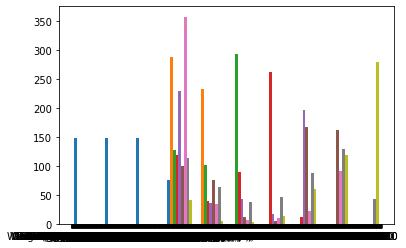

In [56]:
plt.hist(df_v1)

In [57]:
df_v1.shape

(522, 9)

## Merging the tables

In [58]:
price_df_2020.head(3)

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,type
69,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2020,50.0,NaN,Bread
70,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2020,50.0,NaN,Bread
71,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2020,50.0,NaN,Bread


In [60]:
df_v1.head(3)

,food_type,protein,fat,carb,sugar,sodium,cholesterol,calcium,kcal
0,Bread,5.88,7.06,51.8,15.3,247,0.0,24.0,306
1,Wheat,10.7,4.53,47.5,5.73,473,0.0,125,274
2,Rice (low quality),0.3,19.2,16.0,4.2,110,24.0,0.0,967


In [64]:
merged_df = pd.merge(left=price_df_2020, right=df_v1, left_on='type', right_on='food_type')

In [71]:
#we can see the characteristics of the new joined table
merged_df.isnull().sum()/len(merged_df)

adm0_id               0.000000
adm0_name             0.000000
adm1_id               0.000000
adm1_name             0.347151
mkt_id                0.000000
mkt_name              0.000000
cm_id                 0.000000
cm_name               0.000000
cur_id                0.000000
cur_name              0.000000
pt_id                 0.000000
pt_name               0.000000
um_id                 0.000000
um_name               0.000000
mp_month              0.000000
mp_year               0.000000
mp_price              0.000000
mp_commoditysource    1.000000
type                  0.000000
food_type             0.000000
protein               0.000000
fat                   0.000000
carb                  0.000000
sugar                 0.000000
sodium                0.000000
cholesterol           0.000000
calcium               0.000000
kcal                  0.000000
dtype: float64

We can wee the new table has some repeated columns, like type and food type are now the same. Then we should drop one of them.

In [72]:
merged_df.head(10)

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,...,type,food_type,protein,fat,carb,sugar,sodium,cholesterol,calcium,kcal
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,...,Bread,Bread,5.88,7.06,51.8,15.3,247,0.0,24.0,306
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,...,Bread,Bread,5.88,7.06,51.8,15.3,247,0.0,24.0,306
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,...,Bread,Bread,5.88,7.06,51.8,15.3,247,0.0,24.0,306
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,...,Bread,Bread,5.88,7.06,51.8,15.3,247,0.0,24.0,306
4,1.0,Afghanistan,272,Badakhshan,267,Mazar,55,Bread - Retail,0.0,AFN,...,Bread,Bread,5.88,7.06,51.8,15.3,247,0.0,24.0,306
5,1.0,Afghanistan,272,Badakhshan,267,Mazar,55,Bread - Retail,0.0,AFN,...,Bread,Bread,5.88,7.06,51.8,15.3,247,0.0,24.0,306
6,1.0,Afghanistan,272,Badakhshan,267,Mazar,55,Bread - Retail,0.0,AFN,...,Bread,Bread,5.88,7.06,51.8,15.3,247,0.0,24.0,306
7,1.0,Afghanistan,272,Badakhshan,267,Mazar,55,Bread - Retail,0.0,AFN,...,Bread,Bread,5.88,7.06,51.8,15.3,247,0.0,24.0,306
8,1.0,Afghanistan,272,Badakhshan,3690,Badakhshan,55,Bread - Retail,0.0,AFN,...,Bread,Bread,5.88,7.06,51.8,15.3,247,0.0,24.0,306
9,1.0,Afghanistan,272,Badakhshan,3690,Badakhshan,55,Bread - Retail,0.0,AFN,...,Bread,Bread,5.88,7.06,51.8,15.3,247,0.0,24.0,306


In [73]:
# dropping the mp_commoditysource (which has all values missing) and dropping repeated columns (type)
# this line should be ran only one time.


# merged_df.drop(columns=['mp_commoditysource','type'], inplace=True)

In [74]:
merged_df

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,...,mp_price,food_type,protein,fat,carb,sugar,sodium,cholesterol,calcium,kcal
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,...,50.0000,Bread,5.88,7.06,51.8,15.3,247,0.0,24.0,306
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,...,50.0000,Bread,5.88,7.06,51.8,15.3,247,0.0,24.0,306
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,...,50.0000,Bread,5.88,7.06,51.8,15.3,247,0.0,24.0,306
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,...,50.0000,Bread,5.88,7.06,51.8,15.3,247,0.0,24.0,306
4,1.0,Afghanistan,272,Badakhshan,267,Mazar,55,Bread - Retail,0.0,AFN,...,60.0000,Bread,5.88,7.06,51.8,15.3,247,0.0,24.0,306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165093,270.0,Zambia,3434,Western,1462,Kalabo,265,"Maize meal (white, breakfast) - Retail",0.0,ZMW,...,6.4480,"Maize meal (white, breakfast)",8.75,5.09,73.9,not found,5.0,not found,5.0,364
165094,270.0,Zambia,3434,Western,1462,Kalabo,265,"Maize meal (white, breakfast) - Retail",0.0,ZMW,...,6.6320,"Maize meal (white, breakfast)",8.75,5.09,73.9,not found,5.0,not found,5.0,364
165095,270.0,Zambia,3434,Western,1462,Kalabo,265,"Maize meal (white, breakfast) - Retail",0.0,ZMW,...,6.4400,"Maize meal (white, breakfast)",8.75,5.09,73.9,not found,5.0,not found,5.0,364
165096,270.0,Zambia,3434,Western,1462,Kalabo,265,"Maize meal (white, breakfast) - Retail",0.0,ZMW,...,6.5168,"Maize meal (white, breakfast)",8.75,5.09,73.9,not found,5.0,not found,5.0,364
